In [1]:
data1 <- read.table("../data/scz_data_Feb_2016_including_noexac.txt", header = TRUE)
data2 <- read.table("../data/scz.dat", header = TRUE)


In [2]:
head(data1)

,Gene,chr,mut_lof,mut_missense,dn_damaging,dn_lof,control_damaging,case_damaging,control_lof,case_lof,ellip.h,case_missense_Singleton_broad,control_missense_Singleton_broad,case_disruptive_Singleton_broad_noexac,control_disruptive_Singleton_broad_noexac,case_damaging_Singleton_broad_noexac,control_damaging_Singleton_broad_noexac,case_deleterious_Singleton_broad_noexac,control_deleterious_Singleton_broad_noexac,case_missense_Singleton_broad_noexac,control_missense_Singleton_broad_noexac
1,A1BG,19,9.996657e-07,2.300224e-05,0,0,1,0,1,0,⋯,4,10,0,1,0,0,0,1,1,6
2,A1BG-AS1,19,1.420491e-07,0,0,0,0,0,0,0,⋯,4,5,0,0,0,0,0,0,1,2
3,A1CF,10,2.144318e-06,1.68827e-05,0,0,5,2,1,2,⋯,4,8,0,0,1,1,1,1,3,8
4,A2M,12,3.981797e-06,4.039597e-05,0,0,8,5,13,6,⋯,13,26,0,1,0,2,0,3,6,12
5,A2M-AS1,12,9.14698e-08,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,A2ML1,12,3.779929e-06,4.007178e-05,0,0,13,3,13,11,⋯,24,20,4,3,1,3,5,6,14,10


In [3]:
data1 <- data1[, c("Gene", "chr", "mut_lof", "mut_missense", "dn_lof", "dn_missense")]
data <- merge(data1, data2)

In [4]:
head(data)
dim(data)

,Gene,chr,mut_lof,mut_missense,dn_lof,dn_missense,length,tot_mu,lof_mu,missense_mu,lof_dn,lof_trans,lof_untrans,lof_case,lof_cont,mis_dn,mis_trans,mis_untrans,mis_case,mis_cont
1,A1BG,19,9.996657e-07,2.300224e-05,0,0,1516,3.631357e-05,9.996657e-07,2.300224e-05,0,1,1,0,0,0,2,5,5,4
2,A1BG-AS1,19,1.420491e-07,0,0,0,12,1.420491e-07,1.420491e-07,0,0,0,0,0,0,0,0,0,0,0
3,A1CF,10,2.144318e-06,1.68827e-05,0,0,1964,2.613491e-05,2.144318e-06,1.68827e-05,0,0,1,1,0,0,3,4,7,7
4,A2M,12,3.981797e-06,4.039597e-05,0,0,4565,6.206197e-05,3.981797e-06,4.039597e-05,0,0,0,0,1,0,7,6,13,7
5,A2M-AS1,12,9.14698e-08,0,0,0,8,9.14698e-08,9.14698e-08,0,0,0,0,0,0,0,0,0,0,0
6,A2ML1,12,3.779929e-06,4.007178e-05,0,0,4507,6.177174e-05,3.779929e-06,4.007178e-05,0,1,1,1,3,0,13,12,16,10


[1] 20407    20

In [5]:
ntrio <- 617 #Menachem
ntrio <- ntrio + 14 #Girard
ntrio <- ntrio + 105 #Gulsuner
ntrio <- ntrio + 57 #McCarthy
ntrio <- ntrio + 231 #Xu

ncase = 617
ncontrol <- 617
N <- list(dn=ntrio, ca=ncase, cn= ncontrol)



## Denovo and transmitted data

In [22]:
denovoCCBinom21 <- "
data {
int<lower=1> NN;
int<lower=1> K;
int<lower=1> Ndn;
int<lower=1> Ncase;
int<lower=1> Ncontrol;
int<lower=1> Ntotal;

int<lower=0> yCaseLoF[NN];
int<lower=0> yTotalLoF[NN];
int<lower=0> yLoFdn[NN];
real<lower=0> mutLoF[NN];

int<lower=0> yCaseMis3[NN];
int<lower=0> yTotalMis3[NN];
int<lower=0> yMis3dn[NN];
real<lower=0> mutMis3[NN];

real<lower=0> thetaH0;

}
parameters {
real<lower=0.001,upper=0.5> pi0;

real<lower=2> hyperGammaMeanLoFcc;
real<lower=0.5> hyperBetaLoFcc;
real<lower=0.5> gammaLoFcc;
real<lower=2> hyperGammaMeanLoFdn;
real<lower=0.5> hyperBetaLoFdn;
real<lower=0.5> gammaLoFdn;

real<lower=2> hyperGammaMeanMis3cc;
real<lower=0.5> hyperBetaMis3cc;
real<lower=0.5> gammaMis3cc;
real<lower=2> hyperGammaMeanMis3dn;
real<lower=0.5> hyperBetaMis3dn;
real<lower=0.5> gammaMis3dn;

}

model {

real ps[K];

//pi0 ~ normal(0.05, 0.1); //uniform(0, 0.1);

hyperGammaMeanLoFdn ~ normal(15, 10);
hyperBetaLoFdn ~ normal(1, 0.01);
gammaLoFdn ~ gamma(hyperGammaMeanLoFdn*hyperBetaLoFdn, hyperBetaLoFdn);

hyperGammaMeanLoFcc ~ normal(15, 10);
hyperBetaLoFcc ~ normal(9, 0.01);
gammaLoFcc ~ gamma(hyperGammaMeanLoFcc*hyperBetaLoFcc, hyperBetaLoFcc);

////
hyperGammaMeanMis3dn ~ normal(15, 10);
hyperBetaMis3dn ~ normal(1, 0.01);
gammaMis3dn ~ gamma(hyperGammaMeanMis3dn*hyperBetaMis3dn, hyperBetaMis3dn);

hyperGammaMeanMis3cc ~ normal(15, 10);
hyperBetaMis3cc ~ normal(9, 0.01);
gammaMis3cc ~ gamma(hyperGammaMeanMis3cc*hyperBetaMis3cc, hyperBetaMis3cc);


for (ii in 1:NN){
ps[1] <- log1m(pi0) 
//+ binomial_log(yLoFdn[ii], Ndn, 2*mutLoF[ii]) + binomial_log(yMis3dn[ii], Ndn, 2*mutMis3[ii]) 
+ poisson_log(yLoFdn[ii], Ndn*2*mutLoF[ii]) + poisson_log(yMis3dn[ii], Ndn*2*mutMis3[ii])
+ binomial_log(yCaseLoF[ii], yTotalLoF[ii], thetaH0)
+ binomial_log(yCaseMis3[ii], yTotalMis3[ii], thetaH0);

ps[2] <- log(pi0)
//+ binomial_log(yLoFdn[ii], Ndn, 2*mutLoF[ii]*gammaLoFdn) + binomial_log(yMis3dn[ii], Ndn, 2*mutMis3[ii]*gammaMis3dn) 
+ poisson_log(yLoFdn[ii], Ndn*2*mutLoF[ii]*gammaLoFdn) +     poisson_log(yMis3dn[ii], Ndn*2*mutMis3[ii]*gammaMis3dn)
+ binomial_log(yCaseLoF[ii], yTotalLoF[ii], gammaLoFcc*Ncase/(gammaLoFcc*Ncase + Ncontrol))
+ binomial_log(yCaseMis3[ii], yTotalMis3[ii], gammaMis3cc*Ncase/(gammaMis3cc*Ncase + Ncontrol));

increment_log_prob(log_sum_exp(ps));
}

}
"


In [23]:
dNumber <- 10
t1 <- as.numeric(data$mut_lof)
t1 <- t1[t1 > 0]
data[data$mut_lof == 0, ]$mut_lof <- min(t1)/dNumber
#data <- data[data$mut_missense >0, ]
t2 <- as.numeric(data$mut_missense)
t2 <- t2[t2 > 0]
data[data$mut_missense == 0, ]$mut_missense <- min(t2)/dNumber
dim(data)


[1] 20407    20

In [24]:
y.case.lof <- data$lof_trans
table(y.case.lof)
y.control.lof <- data$lof_untrans
table(y.control.lof)
yLoF <- data$dn_lof
table(yLoF)
mutLoF <- data$mut_lof
range(mutLoF)

y.case.mis3 <- data$mis_trans
table(y.case.mis3)
y.control.mis3 <- data$mis_untrans
table(y.control.mis3)

yMis3 <- data$dn_missense
table(yMis3)
mutMis3 <- data$mut_mis
range(mutMis3)

y.case.lof
    0     1     2     3     4     5     6    11 
17632  2288   386    77    18     3     2     1 

y.control.lof
    0     1     2     3     4     5     6     7     8 
17499  2397   399    76    25     8     1     1     1 

yLoF
    0     1     2 
20299   105     3 

[1] 1.113284e-09 7.487104e-05

y.case.mis3
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6301 3664 3024 2250 1584 1031  717  472  332  241  179  126   98   75   63   44 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  33   24   25   21   15   11   10    4    6    6    6    5    3   10    2    2 
  32   33   34   35   36   38   39   40   41   43   44   47   56   61   71   99 
   2    1    2    2    1    1    2    1    3    1    1    1    1    1    1    1 
 219 
   1 

y.control.mis3
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6177 3615 3030 2244 1616 1056  746  535  348  248  174  124  105   71   58   38 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  25   35   23   21   19    8    8   14    6    8    4    6    5    6    7    4 
  32   33   34   35   36   37   38   40   41   45   46   47   49   52   62   94 
   4    1    1    2    1    2    1    1    1    1    1    1    2    1    1    1 
 204 
   1 

yMis3
    0     1     2     3 
19813   577    16     1 

[1] 5.566513e-08 1.017005e-03

In [29]:
library("rstan")

#initList <- initList[1:nChain]

mixdataDenovoCC2 <- list(K = 2, 
                      yCaseLoF = y.case.lof, yTotalLoF = y.case.lof + y.control.lof,
                        
                        yCaseMis3 = y.case.mis3, yTotalMis3 = y.case.mis3 + y.control.mis3,
                        
                        yLoFdn = yLoF, mutLoF = mutLoF,
                        yMis3dn = yMis3, mutMis3 = mutMis3,
                        
                        NN = length(y.case.lof),
                        Ncase = N$ca, Ncontrol = N$cn, Ntotal = N$ca + N$cn,
                        Ndn = N$dn,
                        thetaH0 = N$ca/(N$ca + N$cn))

Nsample <- 10000
nSeed1 <- floor(runif(1, 1, 10^6))
mBothDenovoCC2 <- stan_model(model_code = denovoCCBinom21)

fBothDenovoCC2 <- vb(mBothDenovoCC2, seed = nSeed1, data = mixdataDenovoCC2,
                     iter = Nsample, output_samples= 1000)
                     
fBothDenovoCC2



This is Automatic Differentiation Variational Inference.

(EXPERIMENTAL ALGORITHM: expect frequent updates to the procedure.)

Gradient evaluation took 0.038 seconds
1000 iterations under these settings should take 38.327 seconds.
Adjust your expectations accordingly!

Begin eta adaptation.
Iteration:   1 / 250 [  0%]  (Adaptation)
Iteration:  50 / 250 [ 20%]  (Adaptation)
Iteration: 100 / 250 [ 40%]  (Adaptation)
Iteration: 150 / 250 [ 60%]  (Adaptation)
Iteration: 200 / 250 [ 80%]  (Adaptation)
Success! Found best value [eta = 1.000] earlier than expected.

Begin stochastic gradient ascent.
  iter       ELBO   delta_ELBO_mean   delta_ELBO_med   notes 
   100  -443613.6             1.000            1.000
   200  -295084.3             0.752            1.000
   300  -321667.1             0.529            0.503
   400  -257282.7             0.459            0.503
   500  -236575.3             0.385            0.250
   600   -72460.6             0.698            0.503
   700   -35788.4  

We recommend genuine 'sampling' from the posterior distribution for final inferences!
We recommend genuine 'sampling' from the posterior distribution for final inferences!


Inference for Stan model: 80f5a4ff9fbc3e0fe7a90f67c0256f5a.
1 chains, each with iter=1000; warmup=0; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

                     mean   sd 2.5%  25%  50%  75% 97.5%
pi0                  0.33 0.05 0.23 0.30 0.33 0.36  0.41
hyperGammaMeanLoFcc  2.11 0.14 2.01 2.03 2.06 2.12  2.47
hyperBetaLoFcc       8.97 0.01 8.94 8.96 8.97 8.97  8.99
gammaLoFcc           0.89 0.06 0.79 0.85 0.89 0.93  1.02
hyperGammaMeanLoFdn  5.68 2.29 2.99 4.23 5.17 6.61 11.35
hyperBetaLoFdn       0.99 0.01 0.97 0.99 0.99 1.00  1.01
gammaLoFdn           4.01 0.54 3.10 3.62 3.98 4.36  5.20
hyperGammaMeanMis3cc 2.12 0.18 2.01 2.04 2.07 2.15  2.54
hyperBetaMis3cc      8.77 0.01 8.75 8.77 8.77 8.78  8.79
gammaMis3cc          0.94 0.02 0.91 0.93 0.94 0.96  0.98
hyperGammaMeanMis3dn 2.77 0.83 2.08 2.28 2.51 2.94  5.04
hyperBetaMis3dn      0.99 0.01 0.97 0.98 0.99 0.99  1.01
gammaMis3dn          0.63 0.09 0.53 0.57 0.61 0.67  0.86
lp__                 0.00 0

In [36]:
nIteration <- 2000
nThin = 2
nChain <- nCore <- 2

if (nIteration > 1000)
    nThin <- floor(nIteration/1000)

initList <- list(list(pi0 = 0.001), list(pi0 = 0.95), list(pi0 = 0.1),
		list(pi0 = 0.9), list(pi0 = 0.7), list(pi0 = 0.3), list(pi0 = 0.95))


testFitDenovoCC2 <- stan(model_code = denovoCCBinom21,
                        data = mixdataDenovoCC2, iter = nIteration, 
			chains = nChain, cores = nCore, 
			thin = nThin, 
                        pars = c('pi0',
                                 'hyperGammaMeanLoFdn', 'hyperGammaMeanLoFcc',
				'hyperGammaMeanMis3dn', 
                                'hyperGammaMeanMis3cc',
                                 'hyperBetaLoFdn', 'hyperBetaLoFcc'))


Inference for Stan model: 80f5a4ff9fbc3e0fe7a90f67c0256f5a.
2 chains, each with iter=2000; warmup=1000; thin=2; 
post-warmup draws per chain=500, total post-warmup draws=1000.

                          mean se_mean   sd      2.5%       25%       50%
pi0                       0.34    0.01 0.09      0.16      0.28      0.34
hyperGammaMeanLoFdn       5.79    0.10 2.27      2.43      4.07      5.51
hyperGammaMeanLoFcc       2.13    0.00 0.11      2.00      2.05      2.10
hyperGammaMeanMis3dn      2.74    0.02 0.67      2.02      2.23      2.56
hyperGammaMeanMis3cc      2.13    0.00 0.12      2.00      2.04      2.10
hyperBetaLoFdn            1.00    0.00 0.01      0.98      0.99      1.00
hyperBetaLoFcc            9.00    0.00 0.01      8.98      8.99      9.00
lp__                 -30945.77    0.17 3.01 -30952.68 -30947.43 -30945.33
                           75%     97.5% n_eff Rhat
pi0                       0.41      0.49   291    1
hyperGammaMeanLoFdn       7.29     10.87   533    1
h

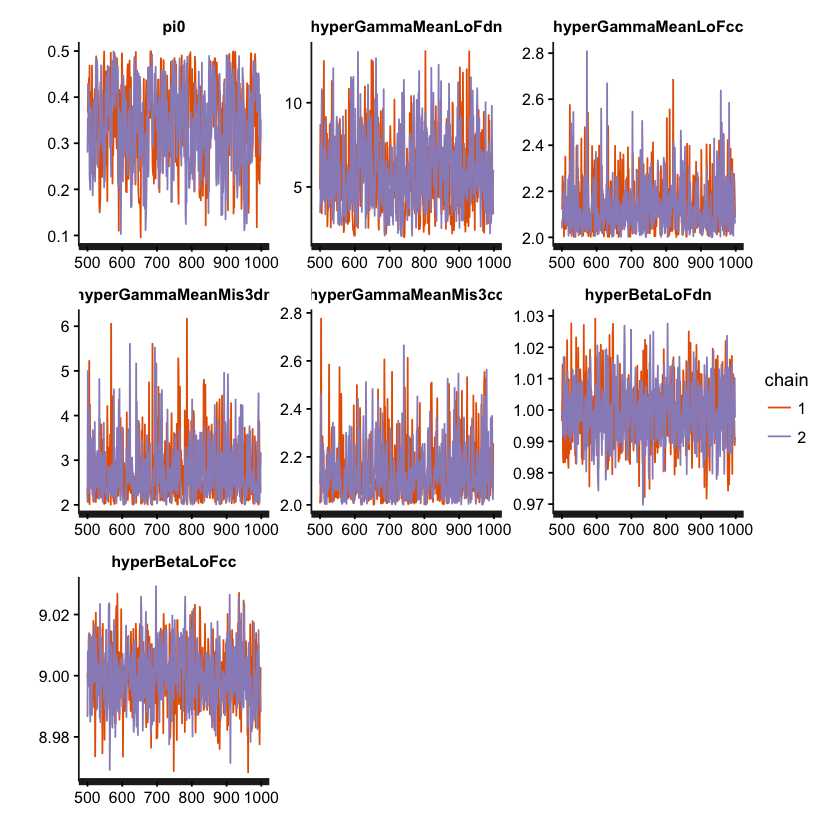

In [37]:
inDex <- "Mac"
testFitDenovoCC2
stan_trace(testFitDenovoCC2)


In [40]:
data1 <- read.table("../data/scz_data_Feb_2016_including_noexac.txt", header = TRUE)
data2 <- read.table("../data/scz.dat", header = TRUE)
data1 <- data1[, c("Gene", "chr", "mut_lof", "mut_missense", "dn_lof", "dn_missense")]
data <- merge(data1, data2)

dNumber <- 10
t1 <- as.numeric(data$mut_lof)
t1 <- t1[t1 > 0]
data[data$mut_lof == 0, ]$mut_lof <- min(t1)/dNumber
#data <- data[data$mut_missense >0, ]
t2 <- as.numeric(data$mut_missense)
t2 <- t2[t2 > 0]
data[data$mut_missense == 0, ]$mut_missense <- min(t2)/dNumber
dim(data)

y.case.lof <- data$lof_trans
y.control.lof <- data$lof_untrans
yLoF <- data$dn_lof
mutLoF <- data$mut_lof
y.case.mis3 <- data$mis_trans
y.control.mis3 <- data$mis_untrans

yMis3 <- data$dn_missense
mutMis3 <- data$mut_mis


bfcc <- function(ycase, ytotal, Ncase, Ncontrol,
                 lower.gamma = 1, upper.gamma = 50,
                 hyperGammaMeanCC = 1.94, hyperBetaCC = 1.98, tolERR = 10^-6){
  bfH0 <- dbinom(ycase, ytotal, prob = pH0)
  
  
  bfH1 <- apply(cbind(ycase, ytotal), 1, function(x){
    f1 <- function(gamma0)
      dbinom(x[1], x[2], gamma0*Ncase/(gamma0*Ncase + Ncontrol))*dgamma(gamma0, 
                                                                        shape = hyperGammaMeanCC*hyperBetaCC,
                                                                        rate = hyperBetaCC)
#    print(x)
    return(integrate(f1, lower = lower.gamma, upper = upper.gamma, rel.tol = tolERR)$value)
  })
  return(bfH1/bfH0)
  
}

Ncase <- N$ca
Ncontrol <- N$cn
pH0 <- Ncase/(Ncase + Ncontrol)

BFccLoF <- bfcc(ycase = y.case.lof, ytotal = y.case.lof + y.control.lof, Ncase = N$ca, Ncontrol = N$cn,
             hyperGammaMeanCC = 2.13, hyperBetaCC = 9)

range(BFccLoF)
yTemp <- y.case.mis3 + y.control.mis3

BFccMis3 <- bfcc(ycase = y.case.mis3, ytotal = y.case.mis3 + y.control.mis3, Ncase = N$ca, Ncontrol = N$cn,
                hyperGammaMeanCC = 2.13, hyperBetaCC = 9)
range(BFccMis3)

source("TADA/TADA.R")

BFdnLoF <- bayes.factor.denovo(x = yLoF, N = N$dn, mu = mutLoF, gamma.mean = 5.79, beta = 1)
BFdnMis3 <- bayes.factor.denovo(x = yMis3, N = N$dn, mu = mutMis3, gamma.mean = 2.74, beta = 1)

BFall <- BFccMis3*BFccLoF*BFdnLoF*BFdnMis3



data$BF <- BFall
data <- data[order(-data$BF),]
pi0 <- 1 - 0.34
data$qvalue <- Bayesian.FDR(data$BF, pi0)$FDR

data1 <- (data[data$qvalue < 0.3, ])
dim(data1)

[1] 20407    20

[1] 0.1261844 3.3865526

[1]  0.008521388 45.976351010

[1] 678  22

In [41]:
write.table(data, "../data/FDR_scz2016_denovo_and_transmittedData_pi034.txt", row.names = FALSE, quote = FALSE)      


### Remove mis3

In [32]:
denovoCCBinomNotMis3 <- "
data {
int<lower=1> NN;
int<lower=1> K;
int<lower=1> Ndn;
int<lower=1> Ncase;
int<lower=1> Ncontrol;
int<lower=1> Ntotal;

int<lower=0> yCaseLoF[NN];
int<lower=0> yTotalLoF[NN];
int<lower=0> yLoFdn[NN];
real<lower=0> mutLoF[NN];

int<lower=0> yMis3dn[NN];
real<lower=0> mutMis3[NN];

real<lower=0> thetaH0;

}
parameters {
real<lower=0.001,upper=0.5> pi0;

real<lower=2> hyperGammaMeanLoFcc;
real<lower=0.5> hyperBetaLoFcc;
real<lower=0.5> gammaLoFcc;
real<lower=2> hyperGammaMeanLoFdn;
real<lower=0.5> hyperBetaLoFdn;
real<lower=0.5> gammaLoFdn;

real<lower=2> hyperGammaMeanMis3dn;
real<lower=0.5> hyperBetaMis3dn;
real<lower=0.5> gammaMis3dn;

}

model {

real ps[K];

//pi0 ~ normal(0.05, 0.1); //uniform(0, 0.1);

hyperGammaMeanLoFdn ~ normal(15, 10);
hyperBetaLoFdn ~ normal(1, 0.01);
gammaLoFdn ~ gamma(hyperGammaMeanLoFdn*hyperBetaLoFdn, hyperBetaLoFdn);

hyperGammaMeanLoFcc ~ normal(15, 10);
hyperBetaLoFcc ~ normal(9, 0.01);
gammaLoFcc ~ gamma(hyperGammaMeanLoFcc*hyperBetaLoFcc, hyperBetaLoFcc);

////
hyperGammaMeanMis3dn ~ normal(15, 10);
hyperBetaMis3dn ~ normal(1, 0.01);
gammaMis3dn ~ gamma(hyperGammaMeanMis3dn*hyperBetaMis3dn, hyperBetaMis3dn);


for (ii in 1:NN){
ps[1] <- log1m(pi0) 
//+ binomial_log(yLoFdn[ii], Ndn, 2*mutLoF[ii]) + binomial_log(yMis3dn[ii], Ndn, 2*mutMis3[ii]) 
+ poisson_log(yLoFdn[ii], Ndn*2*mutLoF[ii]) + poisson_log(yMis3dn[ii], Ndn*2*mutMis3[ii])
+ binomial_log(yCaseLoF[ii], yTotalLoF[ii], thetaH0);

ps[2] <- log(pi0)
//+ binomial_log(yLoFdn[ii], Ndn, 2*mutLoF[ii]*gammaLoFdn) + binomial_log(yMis3dn[ii], Ndn, 2*mutMis3[ii]*gammaMis3dn) 
+ poisson_log(yLoFdn[ii], Ndn*2*mutLoF[ii]*gammaLoFdn) +     poisson_log(yMis3dn[ii], Ndn*2*mutMis3[ii]*gammaMis3dn)
+ binomial_log(yCaseLoF[ii], yTotalLoF[ii], gammaLoFcc*Ncase/(gammaLoFcc*Ncase + Ncontrol));

increment_log_prob(log_sum_exp(ps));
}

}
"


In [33]:
mixdataDenovoCC23 <- list(K = 2, 
                         yCaseLoF = y.case.lof, yTotalLoF = y.case.lof + y.control.lof,
                         
                   #      yCaseMis3 = y.case.mis3, yTotalMis3 = y.case.mis3 + y.control.mis3,
                         
                         yLoFdn = yLoF, mutLoF = mutLoF,
                         yMis3dn = yMis3, mutMis3 = mutMis3,
                         
                         NN = length(y.case.lof),
                         Ncase = N$ca, Ncontrol = N$cn, Ntotal = N$ca + N$cn,
                         Ndn = N$dn,
                         thetaH0 = N$ca/(N$ca + N$cn))

Nsample <- 10000
nSeed1 <- floor(runif(1, 1, 10^6))
mBothDenovoCC2 <- stan_model(model_code = denovoCCBinomNotMis3)

fBothDenovoCC23 <- vb(mBothDenovoCC2, seed = nSeed1, data = mixdataDenovoCC23)

fBothDenovoCC23


This is Automatic Differentiation Variational Inference.

(EXPERIMENTAL ALGORITHM: expect frequent updates to the procedure.)

Gradient evaluation took 0.020 seconds
1000 iterations under these settings should take 20.058 seconds.
Adjust your expectations accordingly!

Begin eta adaptation.
Iteration:   1 / 250 [  0%]  (Adaptation)
Iteration:  50 / 250 [ 20%]  (Adaptation)
Iteration: 100 / 250 [ 40%]  (Adaptation)
Iteration: 150 / 250 [ 60%]  (Adaptation)
Iteration: 200 / 250 [ 80%]  (Adaptation)
Success! Found best value [eta = 1.000] earlier than expected.

Begin stochastic gradient ascent.
  iter       ELBO   delta_ELBO_mean   delta_ELBO_med   notes 
   100    -7679.7             1.000            1.000
   200    -7637.4             0.503            1.000
   300    -7474.4             0.342            0.022
   400    -7338.7             0.261            0.022
   500    -7221.8             0.212            0.018
   600    -7271.8             0.178            0.018
   700    -7323.2  

We recommend genuine 'sampling' from the posterior distribution for final inferences!
We recommend genuine 'sampling' from the posterior distribution for final inferences!


Inference for Stan model: 85d813b15cf0a18cde302e52fd24abd1.
1 chains, each with iter=1000; warmup=0; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

                      mean   sd  2.5%   25%   50%   75% 97.5%
pi0                   0.03 0.01  0.02  0.03  0.03  0.04  0.05
hyperGammaMeanLoFcc   2.36 0.38  2.04  2.13  2.25  2.44  3.57
hyperBetaLoFcc        8.90 0.01  8.88  8.90  8.90  8.91  8.92
gammaLoFcc            1.76 0.39  1.16  1.48  1.71  1.99  2.67
hyperGammaMeanLoFdn  24.23 4.92 16.13 20.75 23.65 27.01 35.36
hyperBetaLoFdn        1.00 0.01  0.98  0.99  1.00  1.00  1.02
gammaLoFdn           28.25 3.75 21.58 25.56 28.04 30.67 36.12
hyperGammaMeanMis3dn  2.95 0.92  2.12  2.36  2.64  3.22  5.46
hyperBetaMis3dn       1.00 0.01  0.98  1.00  1.00  1.01  1.02
gammaMis3dn           1.44 0.60  0.74  1.01  1.29  1.68  2.87
lp__                  0.00 0.00  0.00  0.00  0.00  0.00  0.00

Approximate samples were drawn using VB(meanfield) at Sat Apr 16 20:44:48 2016.

In [34]:
nIteration <- 5000
nThin = 5
nChain <- nCore <- 2
testFitDenovoCCnotMis3 <- stan(model_code = denovoCCBinomNotMis3,
                         data = mixdataDenovoCC2, iter = nIteration, 
                         chains = nChain, cores = nCore, 
                         thin = nThin, 
                         pars = c('pi0',
                                  'hyperGammaMeanLoFdn', 'hyperGammaMeanLoFcc',
                                  'hyperGammaMeanMis3dn', 
                                  'hyperBetaLoFdn', 'hyperBetaLoFcc'))

Inference for Stan model: 85d813b15cf0a18cde302e52fd24abd1.
2 chains, each with iter=5000; warmup=2500; thin=5; 
post-warmup draws per chain=500, total post-warmup draws=1000.

                         mean se_mean   sd     2.5%      25%      50%      75%
pi0                      0.35    0.01 0.11     0.04     0.29     0.37     0.43
hyperGammaMeanLoFdn      6.53    0.34 4.75     2.31     4.01     5.42     7.21
hyperGammaMeanLoFcc      2.15    0.01 0.22     2.00     2.04     2.10     2.19
hyperGammaMeanMis3dn     2.76    0.02 0.67     2.03     2.25     2.57     3.10
hyperBetaLoFdn           1.00    0.00 0.01     0.98     0.99     1.00     1.01
hyperBetaLoFcc           9.00    0.00 0.01     8.98     8.99     9.00     9.01
lp__                 -7147.34    0.09 2.66 -7153.20 -7148.92 -7146.95 -7145.37
                        97.5% n_eff Rhat
pi0                      0.49   303 1.01
hyperGammaMeanLoFdn     22.78   199 1.01
hyperGammaMeanLoFcc      2.55   497 1.00
hyperGammaMeanMis3dn     4.

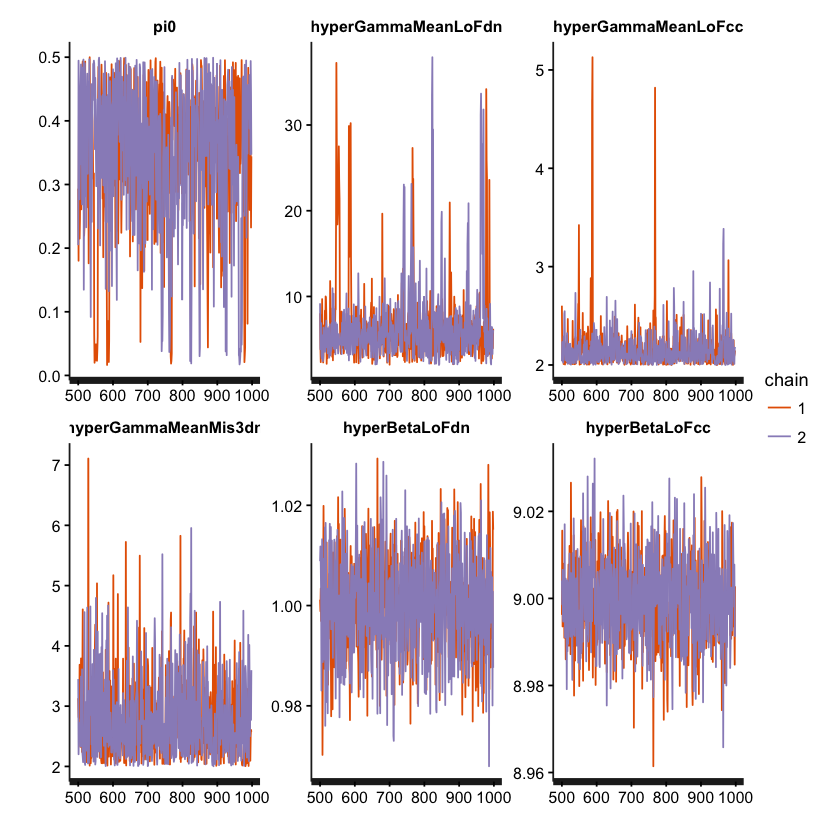

In [35]:
testFitDenovoCCnotMis3


#pdf(paste("Traceplot_", annotationType, "_", annotationType2, ".pdf", sep = ""))
stan_trace(testFitDenovoCCnotMis3)

In [15]:
data1 <- read.table("../data/scz_data_Feb_2016_including_noexac.txt", header = TRUE)
data2 <- read.table("../data/scz.dat", header = TRUE)
data1 <- data1[, c("Gene", "chr", "mut_lof", "mut_missense", "dn_lof", "dn_missense")]
data <- merge(data1, data2)

dNumber <- 10
t1 <- as.numeric(data$mut_lof)
t1 <- t1[t1 > 0]
data[data$mut_lof == 0, ]$mut_lof <- min(t1)/dNumber
#data <- data[data$mut_missense >0, ]
t2 <- as.numeric(data$mut_missense)
t2 <- t2[t2 > 0]
data[data$mut_missense == 0, ]$mut_missense <- min(t2)/dNumber
dim(data)

y.case.lof <- data$lof_trans
y.control.lof <- data$lof_untrans
yLoF <- data$dn_lof
mutLoF <- data$mut_lof
y.case.mis3 <- data$mis_trans
y.control.mis3 <- data$mis_untrans

yMis3 <- data$dn_missense
mutMis3 <- data$mut_mis


bfcc <- function(ycase, ytotal, Ncase, Ncontrol,
                 lower.gamma = 1, upper.gamma = 50,
                 hyperGammaMeanCC = 1.94, hyperBetaCC = 1.98, tolERR = 10^-6){
  bfH0 <- dbinom(ycase, ytotal, prob = pH0)
  
  
  bfH1 <- apply(cbind(ycase, ytotal), 1, function(x){
    f1 <- function(gamma0)
      dbinom(x[1], x[2], gamma0*Ncase/(gamma0*Ncase + Ncontrol))*dgamma(gamma0, 
                                                                        shape = hyperGammaMeanCC*hyperBetaCC,
                                                                        rate = hyperBetaCC)
#    print(x)
    return(integrate(f1, lower = lower.gamma, upper = upper.gamma, rel.tol = tolERR)$value)
  })
  return(bfH1/bfH0)
  
}

Ncase <- N$ca
Ncontrol <- N$cn
pH0 <- Ncase/(Ncase + Ncontrol)

BFccLoF <- bfcc(ycase = y.case.lof, ytotal = y.case.lof + y.control.lof, Ncase = N$ca, Ncontrol = N$cn,
             hyperGammaMeanCC = 2.15, hyperBetaCC = 9)

range(BFccLoF)
yTemp <- y.case.mis3 + y.control.mis3

BFccMis3 <- bfcc(ycase = y.case.mis3, ytotal = y.case.mis3 + y.control.mis3, Ncase = N$ca, Ncontrol = N$cn,
                hyperGammaMeanCC = 1, hyperBetaCC = 10000)
range(BFccMis3)

source("TADA/TADA.R")

BFdnLoF <- bayes.factor.denovo(x = yLoF, N = N$dn, mu = mutLoF, gamma.mean = 6.53, beta = 1)
BFdnMis3 <- bayes.factor.denovo(x = yMis3, N = N$dn, mu = mutMis3, gamma.mean = 2.16, beta = 1)

BFall <- BFccMis3*BFccLoF*BFdnLoF*BFdnMis3



data$BF <- BFall
data <- data[order(-data$BF),]
pi0 <- 1 - 0.35
data$qvalue <- Bayesian.FDR(data$BF, pi0)$FDR

data1 <- (data[data$qvalue < 0.3, ])
dim(data1)

[1] 20407    20

[1] 0.1217423 3.4269168

[1] 3.985739e-06 5.125216e-01

[1] 47 22

In [16]:
write.table(data, "../data/FDR_scz2016_denovo_and_transmittedData_pi035.notMis3.txt", row.names = FALSE, quote = FALSE)      


## Only use de novo data

In [43]:
denovoOnly <- "
data {
int<lower=1> NN;
int<lower=1> K;
int<lower=1> Ndn;

int<lower=0> yLoFdn[NN];
real<lower=0> mutLoF[NN];

int<lower=0> yMis3dn[NN];
real<lower=0> mutMis3[NN];


}
parameters {
real<lower=0.001,upper=0.5> pi0;

real<lower=2> hyperGammaMeanLoFdn;
real<lower=0.5> hyperBetaLoFdn;
real<lower=0.5> gammaLoFdn;

real<lower=2> hyperGammaMeanMis3dn;
real<lower=0.5> hyperBetaMis3dn;
real<lower=0.5> gammaMis3dn;

}

model {

real ps[K];


hyperGammaMeanLoFdn ~ normal(15, 10);
hyperBetaLoFdn ~ normal(1, 0.01);
gammaLoFdn ~ gamma(hyperGammaMeanLoFdn*hyperBetaLoFdn, hyperBetaLoFdn);


////
hyperGammaMeanMis3dn ~ normal(15, 10);
hyperBetaMis3dn ~ normal(1, 0.01);
gammaMis3dn ~ gamma(hyperGammaMeanMis3dn*hyperBetaMis3dn, hyperBetaMis3dn);


for (ii in 1:NN){
ps[1] <- log1m(pi0) 
+ poisson_log(yLoFdn[ii], Ndn*2*mutLoF[ii]) + poisson_log(yMis3dn[ii], Ndn*2*mutMis3[ii]);

ps[2] <- log(pi0)
+ poisson_log(yLoFdn[ii], Ndn*2*mutLoF[ii]*gammaLoFdn) +     poisson_log(yMis3dn[ii], Ndn*2*mutMis3[ii]*gammaMis3dn);

increment_log_prob(log_sum_exp(ps));
}

}
"


In [44]:
mixdataDenovo <- list(K = 2, 
                         yCaseLoF = y.case.lof, yTotalLoF = y.case.lof + y.control.lof,
                         
                   #      yCaseMis3 = y.case.mis3, yTotalMis3 = y.case.mis3 + y.control.mis3,
                         
                         yLoFdn = yLoF, mutLoF = mutLoF,
                         yMis3dn = yMis3, mutMis3 = mutMis3,
                         
                         NN = length(y.case.lof),
                         Ndn = N$dn,
                         thetaH0 = N$ca/(N$ca + N$cn))

Nsample <- 10000
nSeed1 <- floor(runif(1, 1, 10^6))
mBothDenovo <- stan_model(model_code = denovoOnly)

fBothDenovo <- vb(mBothDenovo, seed = nSeed1, data = mixdataDenovo)

fBothDenovo

clang: warning: optimization flag '-ffat-lto-objects' is not supported
clang: warning: argument unused during compilation: '-ffat-lto-objects'

This is Automatic Differentiation Variational Inference.

(EXPERIMENTAL ALGORITHM: expect frequent updates to the procedure.)

Gradient evaluation took 0.010367 seconds
1000 iterations under these settings should take 10.367 seconds.
Adjust your expectations accordingly!

Begin eta adaptation.
Iteration:   1 / 250 [  0%]  (Adaptation)
Iteration:  50 / 250 [ 20%]  (Adaptation)
Iteration: 100 / 250 [ 40%]  (Adaptation)
Iteration: 150 / 250 [ 60%]  (Adaptation)
Iteration: 200 / 250 [ 80%]  (Adaptation)
Success! Found best value [eta = 1] earlier than expected.

Begin stochastic gradient ascent.
  iter       ELBO   delta_ELBO_mean   delta_ELBO_med   notes 
   100     -3e+03             1.000            1.000
   200    -3149.7             0.501            1.000
   300    -3147.5             0.334            0.001   MEDIAN ELBO CONVERGED

Drawing 100

We recommend genuine 'sampling' from the posterior distribution for final inferences!
We recommend genuine 'sampling' from the posterior distribution for final inferences!


Inference for Stan model: 2b4d4af0a2997edb371a234042c828a1.
1 chains, each with iter=1000; warmup=0; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

                     mean   sd 2.5%  25%  50%  75% 97.5%
pi0                  0.36 0.06 0.23 0.32 0.37 0.40  0.45
hyperGammaMeanLoFdn  5.61 2.29 2.98 4.07 5.10 6.47 11.37
hyperBetaLoFdn       1.00 0.01 0.98 0.99 1.00 1.00  1.01
gammaLoFdn           3.54 0.56 2.60 3.16 3.48 3.86  4.79
hyperGammaMeanMis3dn 2.87 1.05 2.07 2.25 2.51 3.07  5.68
hyperBetaMis3dn      1.01 0.01 0.99 1.00 1.01 1.02  1.03
gammaMis3dn          0.66 0.09 0.55 0.60 0.65 0.70  0.88
lp__                 0.00 0.00 0.00 0.00 0.00 0.00  0.00

Approximate samples were drawn using VB(meanfield) at Mon Apr 18 16:47:45 2016.

In [45]:
nIteration <- 5000
nThin = 5
nChain <- nCore <- 2
testFitDenovo <- stan(model_code = denovoOnly,
                         data = mixdataDenovo, iter = nIteration, 
                         chains = nChain, cores = nCore, 
                         thin = nThin, 
                         pars = c('pi0',
                                  'hyperGammaMeanLoFdn', 
                                  'hyperGammaMeanMis3dn', 
                                  'hyperBetaLoFdn'))


Inference for Stan model: 2b4d4af0a2997edb371a234042c828a1.
2 chains, each with iter=5000; warmup=2500; thin=5; 
post-warmup draws per chain=500, total post-warmup draws=1000.

                         mean se_mean   sd     2.5%      25%      50%      75%
pi0                      0.35    0.00 0.10     0.14     0.29     0.37     0.43
hyperGammaMeanLoFdn      5.85    0.10 2.82     2.29     4.00     5.35     7.16
hyperGammaMeanMis3dn     2.76    0.02 0.67     2.03     2.25     2.56     3.09
hyperBetaLoFdn           1.00    0.00 0.01     0.98     0.99     1.00     1.01
lp__                 -3145.66    0.08 2.05 -3150.38 -3146.93 -3145.40 -3144.07
                        97.5% n_eff Rhat
pi0                      0.49   665    1
hyperGammaMeanLoFdn     12.82   730    1
hyperGammaMeanMis3dn     4.47  1000    1
hyperBetaLoFdn           1.02  1000    1
lp__                 -3142.60   707    1

Samples were drawn using NUTS(diag_e) at Mon Apr 18 17:01:25 2016.
For each parameter, n_eff is a crud

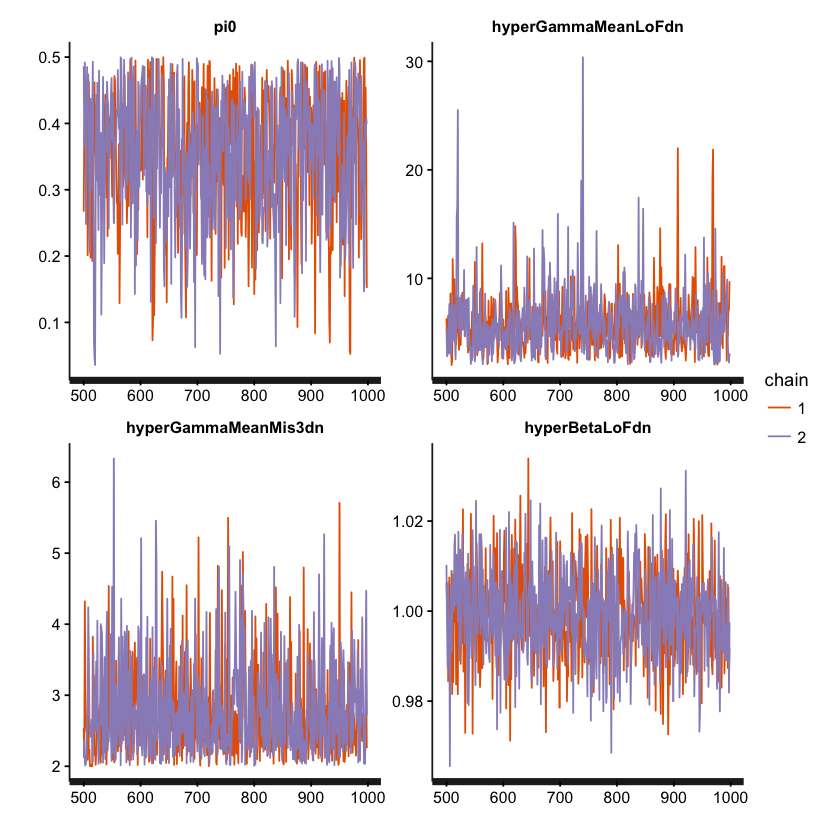

In [46]:
testFitDenovo
stan_trace(testFitDenovo)

### Only use transmitted data

In [6]:
CCBinom21 <- "
data {
int<lower=1> NN;
int<lower=1> K;
int<lower=1> Ncase;
int<lower=1> Ncontrol;
int<lower=1> Ntotal;

int<lower=0> yCaseLoF[NN];
int<lower=0> yTotalLoF[NN];

int<lower=0> yCaseMis3[NN];
int<lower=0> yTotalMis3[NN];

real<lower=0> thetaH0;

}
parameters {
real<lower=0.001,upper=0.5> pi0;

real<lower=2> hyperGammaMeanLoFcc;
real<lower=0.5> hyperBetaLoFcc;
real<lower=0.5> gammaLoFcc;

real<lower=2> hyperGammaMeanMis3cc;
real<lower=0.5> hyperBetaMis3cc;
real<lower=0.5> gammaMis3cc;

}

model {

real ps[K];

//pi0 ~ normal(0.05, 0.1); //uniform(0, 0.1);


hyperGammaMeanLoFcc ~ normal(15, 10);
hyperBetaLoFcc ~ normal(9, 0.01);
gammaLoFcc ~ gamma(hyperGammaMeanLoFcc*hyperBetaLoFcc, hyperBetaLoFcc);


hyperGammaMeanMis3cc ~ normal(15, 10);
hyperBetaMis3cc ~ normal(9, 0.01);
gammaMis3cc ~ gamma(hyperGammaMeanMis3cc*hyperBetaMis3cc, hyperBetaMis3cc);


for (ii in 1:NN){
ps[1] <- log1m(pi0) 
+ binomial_log(yCaseLoF[ii], yTotalLoF[ii], thetaH0)
+ binomial_log(yCaseMis3[ii], yTotalMis3[ii], thetaH0);

ps[2] <- log(pi0)
+ binomial_log(yCaseLoF[ii], yTotalLoF[ii], gammaLoFcc*Ncase/(gammaLoFcc*Ncase + Ncontrol))
+ binomial_log(yCaseMis3[ii], yTotalMis3[ii], gammaMis3cc*Ncase/(gammaMis3cc*Ncase + Ncontrol));

increment_log_prob(log_sum_exp(ps));
}

}
"

dNumber <- 10
t1 <- as.numeric(data$mut_lof)
t1 <- t1[t1 > 0]
data[data$mut_lof == 0, ]$mut_lof <- min(t1)/dNumber
#data <- data[data$mut_missense >0, ]
t2 <- as.numeric(data$mut_missense)
t2 <- t2[t2 > 0]
data[data$mut_missense == 0, ]$mut_missense <- min(t2)/dNumber
dim(data)

y.case.lof <- data$lof_trans
table(y.case.lof)
y.control.lof <- data$lof_untrans
table(y.control.lof)
yLoF <- data$dn_lof
table(yLoF)
mutLoF <- data$mut_lof
range(mutLoF)

y.case.mis3 <- data$mis_trans
table(y.case.mis3)
y.control.mis3 <- data$mis_untrans
table(y.control.mis3)

yMis3 <- data$dn_missense
table(yMis3)
mutMis3 <- data$mut_mis
range(mutMis3)

[1] 20407    20

y.case.lof
    0     1     2     3     4     5     6    11 
17632  2288   386    77    18     3     2     1 

y.control.lof
    0     1     2     3     4     5     6     7     8 
17499  2397   399    76    25     8     1     1     1 

yLoF
    0     1     2 
20299   105     3 

[1] 1.113284e-09 7.487104e-05

y.case.mis3
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6301 3664 3024 2250 1584 1031  717  472  332  241  179  126   98   75   63   44 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  33   24   25   21   15   11   10    4    6    6    6    5    3   10    2    2 
  32   33   34   35   36   38   39   40   41   43   44   47   56   61   71   99 
   2    1    2    2    1    1    2    1    3    1    1    1    1    1    1    1 
 219 
   1 

y.control.mis3
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
6177 3615 3030 2244 1616 1056  746  535  348  248  174  124  105   71   58   38 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  25   35   23   21   19    8    8   14    6    8    4    6    5    6    7    4 
  32   33   34   35   36   37   38   40   41   45   46   47   49   52   62   94 
   4    1    1    2    1    2    1    1    1    1    1    1    2    1    1    1 
 204 
   1 

yMis3
    0     1     2     3 
19813   577    16     1 

[1] 5.566513e-08 1.017005e-03

In [11]:
library("rstan")

#initList <- initList[1:nChain]

mixdataCC2 <- list(K = 2, 
                      yCaseLoF = y.case.lof, yTotalLoF = y.case.lof + y.control.lof,
                        
                        yCaseMis3 = y.case.mis3, yTotalMis3 = y.case.mis3 + y.control.mis3,
                        
                        
                        NN = length(y.case.lof),
                        Ncase = N$ca, Ncontrol = N$cn, Ntotal = N$ca + N$cn,
                        thetaH0 = N$ca/(N$ca + N$cn))

Nsample <- 10000
nSeed1 <- floor(runif(1, 1, 10^6))
mCC2 <- stan_model(model_code = CCBinom21)

fCC2 <- vb(mCC2, seed = nSeed1, data = mixdataCC2)
                     
                     
fCC2



This is Automatic Differentiation Variational Inference.

(EXPERIMENTAL ALGORITHM: expect frequent updates to the procedure.)

Gradient evaluation took 0.029 seconds
1000 iterations under these settings should take 28.860 seconds.
Adjust your expectations accordingly!

Begin eta adaptation.
Iteration:   1 / 250 [  0%]  (Adaptation)
Iteration:  50 / 250 [ 20%]  (Adaptation)
Iteration: 100 / 250 [ 40%]  (Adaptation)
Iteration: 150 / 250 [ 60%]  (Adaptation)
Iteration: 200 / 250 [ 80%]  (Adaptation)
Success! Found best value [eta = 1.000] earlier than expected.

Begin stochastic gradient ascent.
  iter       ELBO   delta_ELBO_mean   delta_ELBO_med   notes 
   100   -41284.6             1.000            1.000
   200   -38933.2             0.530            1.000
   300   -39697.8             0.360            0.060
   400   -39801.5             0.271            0.060
   500   -28517.8             0.296            0.060
   600   -28128.6             0.249            0.060
   700   -28177.2  

We recommend genuine 'sampling' from the posterior distribution for final inferences!
We recommend genuine 'sampling' from the posterior distribution for final inferences!


Inference for Stan model: 570de833ffeb197ad367db22ef10a812.
1 chains, each with iter=1000; warmup=0; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=1000.

                     mean   sd 2.5%  25%  50%  75% 97.5%
pi0                  0.00 0.00 0.00 0.00 0.00 0.00  0.01
hyperGammaMeanLoFcc  4.65 0.68 3.60 4.15 4.55 5.04  6.31
hyperBetaLoFcc       9.15 0.01 9.14 9.15 9.15 9.16  9.17
gammaLoFcc           4.70 0.67 3.48 4.24 4.65 5.13  6.14
hyperGammaMeanMis3cc 2.53 1.52 2.01 2.04 2.13 2.39  5.82
hyperBetaMis3cc      8.94 0.02 8.90 8.93 8.94 8.96  8.98
gammaMis3cc          2.35 0.44 1.65 2.03 2.30 2.60  3.31
lp__                 0.00 0.00 0.00 0.00 0.00 0.00  0.00

Approximate samples were drawn using VB(meanfield) at Tue Apr 19 11:37:41 2016.

In [12]:
nIteration <- 2000
nThin = 2
nChain <- nCore <- 2

if (nIteration > 1000)
    nThin <- floor(nIteration/1000)

initList <- list(list(pi0 = 0.001), list(pi0 = 0.95), list(pi0 = 0.1),
		list(pi0 = 0.9), list(pi0 = 0.7), list(pi0 = 0.3), list(pi0 = 0.95))


testFitCC2 <- stan(model_code = CCBinom21,
                        data = mixdataCC2, iter = nIteration, 
            chains = nChain, cores = nCore, 
            thin = nThin, 
                        pars = c('pi0',
        'hyperGammaMeanLoFcc',
                                'hyperGammaMeanMis3cc',
        'hyperBetaLoFcc'))


Inference for Stan model: 570de833ffeb197ad367db22ef10a812.
2 chains, each with iter=2000; warmup=1000; thin=2; 
post-warmup draws per chain=500, total post-warmup draws=1000.

                          mean se_mean   sd      2.5%       25%       50%
pi0                       0.00    0.00 0.00      0.00      0.00      0.00
hyperGammaMeanLoFcc      16.06    0.49 8.60      3.28      8.95     15.56
hyperGammaMeanMis3cc      9.72    0.51 7.32      2.12      3.90      7.62
hyperBetaLoFcc            9.00    0.00 0.01      8.98      8.99      9.00
lp__                 -27796.05    0.13 2.27 -27801.01 -27797.36 -27795.75
                           75%     97.5% n_eff Rhat
pi0                       0.00      0.01   383    1
hyperGammaMeanLoFcc      21.70     34.17   307    1
hyperGammaMeanMis3cc     13.63     29.61   208    1
hyperBetaLoFcc            9.01      9.02   910    1
lp__                 -27794.38 -27792.59   288    1

Samples were drawn using NUTS(diag_e) at Tue Apr 19 12:40:33 2016.

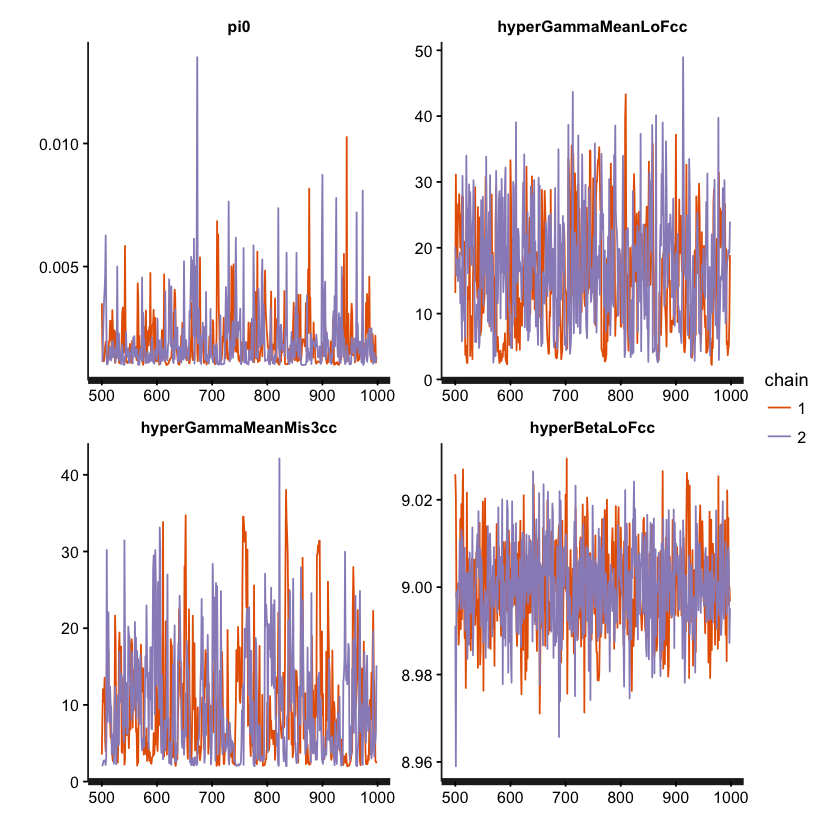

In [13]:
testFitCC2
stan_trace(testFitCC2)